# **Entrega 2 - Reconocimiento de patrones**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Importar librerias necesarias. Si necesita mas, incluyalas aqui
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Ejercicio 1**
Realice la estructuración de los siguientes [archivos](https://drive.google.com/file/d/1P6GoINnF1N68RrNQ9dXAI6dUfzO1IiZD/view?usp=sharing). A continuación, cargue las imágenes y guárdelas en una lista con el nombre que ud desee. Esta lista será la base para la realización de los demás ejercicios. En esta sección, puede añadir las celdas de código que considere. 

In [25]:
path = "/content/drive/MyDrive/repositorio/Evaluación 2"

#---- Introduzca su codigo aqui

lista_ext=[".png",".jpg"]
lista_imgs=[]
for file_ in os.listdir(path):
  ext=os.path.splitext(file_)[1].lower()
  if ext in lista_ext:
    lista_imgs.append(path + file_)
print(lista_imgs)

lista_imgs=[]
for file_ in lista_imgs:
  img=cv2.imread(file_)
  img= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  lista_imgs.append(img)

list_resized_img=[]
for img in lista_imgs:
  img=cv2.resize(img,(481,321),cv2.INTER_CUBIC)

#---- Muestre imagen

print(len(lista_imgs))

['/content/drive/MyDrive/repositorio/Evaluación 2243345.png', '/content/drive/MyDrive/repositorio/Evaluación 27687897.png', '/content/drive/MyDrive/repositorio/Evaluación 2Ex_4 (1).png', '/content/drive/MyDrive/repositorio/Evaluación 2645645jh.jpg', '/content/drive/MyDrive/repositorio/Evaluación 2Baboon.png', '/content/drive/MyDrive/repositorio/Evaluación 256rgfy56.jpg', '/content/drive/MyDrive/repositorio/Evaluación 254edsf.png', '/content/drive/MyDrive/repositorio/Evaluación 2sudoku1.jpg']
0


## **Ejercicio 2**

Realice la segmentación de todos los objetos de color amarillo en todas las imágenes ya estructuradas. La imágen resultado debe ser similar a la mostrada [aquí](https://drive.google.com/file/d/1QKtRcSsbDHrz4NkrDlTKubLYf8FMX-GX/view?usp=sharing). En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** recuerden que es más fácil realizar segmentación por color con imágenes en HSV. Para ayudarles, les recomiendo que realicen esto a partir del histograma de una imagen y luego extrapolen a las demás. También les recomiendo que consulten sobre los valores de los rangos del color en HSV.

In [26]:
#---- Introduzca su codigo aqui
list_yellow=[]
n=0
for img in list_resized_img:

  img_y=list_resized_img[n]
  n=n+1
  plt.imshow(img_y)
  plt.show()
  list_yellow.append(img_y)

umbral_bajo = (20,100,100)
umbral_alto = (40,240,240)

for img_y in list_yellow:

  mask = cv2.inRange(img_y, umbral_bajo, umbral_alto)
  res = cv2.bitwise_and(img, img_y, mask=mask)

  # Elegimos el umbral de rojo en HSV
  umbral_bajo1 = (22,80,100)
  umbral_alto1 = (28,240,240)
  # Elegimos el segundo umbral de rojo en HSV
  umbral_bajo2 = (24,80,100)
  umbral_alto2 = (30,255,255)
  # Creamos la mask y filtramos en la original
  mask1 = cv2.inRange(img_y, umbral_bajo1, umbral_alto1)
  mask2 = cv2.inRange(img_y, umbral_bajo2, umbral_alto2)
  mask = mask1 + mask2
  res = cv2.bitwise_and(img_y, img_y, mask = mask)

  fig, axes = plt.subplots(1,2, figsize = (15,5))
  axes[0].imshow( cv2.cvtColor(img_y,cv2.COLOR_HSV2RGB) ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Mostrar imagen
  axes[1].imshow( cv2.cvtColor(res,cv2.COLOR_HSV2RGB) ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Mostrar Resultado

  plt.imshow()

## **Ejercicio 3**

Realice la segmentación de de todos los objetos en todas las imágenes ya estructuradas en escala de grises (ver la siguiente [imagen](https://drive.google.com/file/d/1qRz_iDHFv9v_6vjDsAFEFgjv6xjfGQgc/view?usp=sharing)). Realice la extracción del fondo de la imágen y deje solo los objetos, tal y como se muestran en las 2 columnas de la imagen. Las imágenes de cada columna se calculan de manera independiente. En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** Las dos imágenes pueden obtenerse usando umbralización. 

In [28]:
#---- Introduzca su codigo aqui
list_gray=[]
n=0
for img in list_resized_img:
  img_g=list_resized_img[n]
  img_rgb=cv2.cvtColor(img_g, cv2.COLOR_HSV2RGB)
  plt.imshow(img_rgb)
  plt.show()
  img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

  list_gray.append(img_gray)
  n=n+1

for img_gray in list_gray:
  plt.imshow(img_gray,cmap="gray")
  plt.show()

## **Ejercicio 4**

A partir de la imagen [sudoku1.jpg](https://drive.google.com/file/d/14tjOAYXvLhl38AFsVyie82MGAlXPeYH0/view?usp=sharing), extraiga el siguiente sudoku y extraiga la siguiente [perspectiva](https://drive.google.com/file/d/1IJH6-cVDJOTyoWwdJofjHKoocba5eyKJ/view?usp=sharing) \\

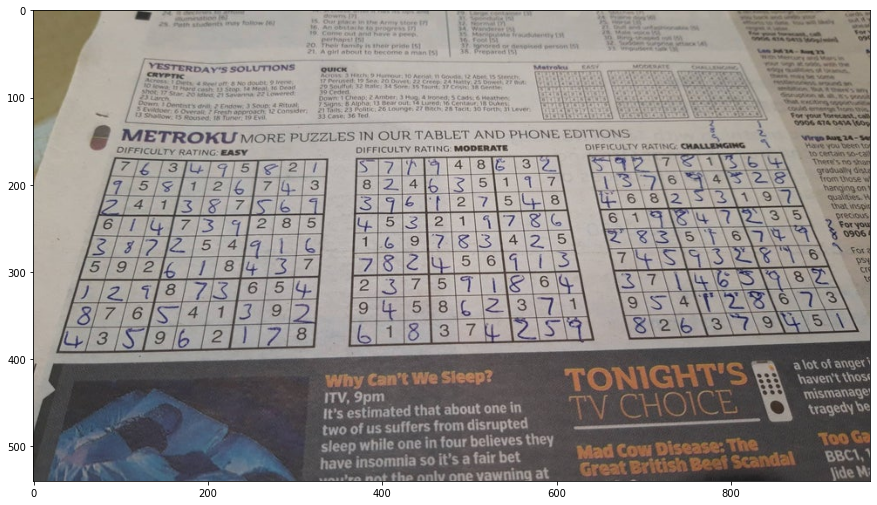

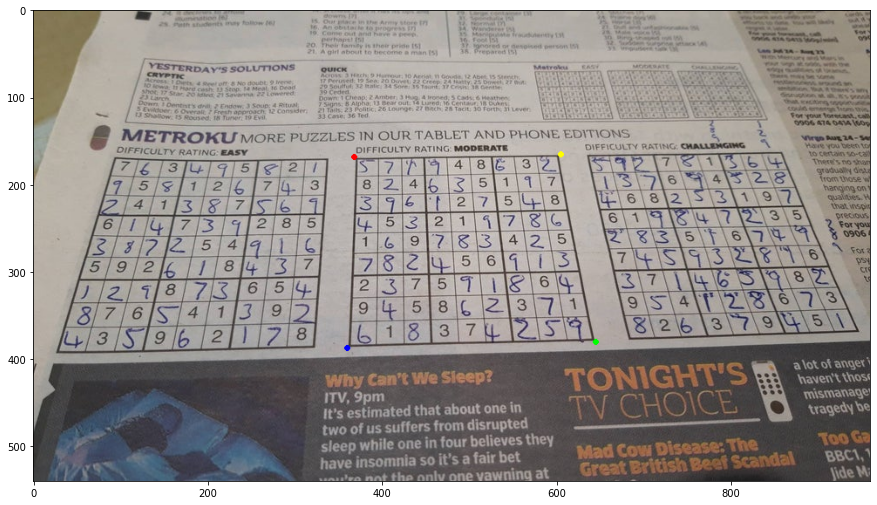

In [ ]:
#---- Introduzca su codigo aqui
img=cv2.imread("/content/drive/MyDrive/repositorio/Evaluación 2/sudoku1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

_,ax=plt.subplots(figsize=(15,10))
ax.imshow(img)

cv2.circle(img, ( 368 , 168 ), 2, [255,0,0],2)#R
cv2.circle(img, ( 360 , 387 ), 2, [0,0,255],2)#B
cv2.circle(img, ( 605 , 165 ), 2, [255,255,0],2)#Y
cv2.circle(img, ( 645 , 380 ), 2, [0,255,0],2)#G
plt.figure(figsize=(15,10))
plt.imshow(img)

# Confirm selected points
points = np.float32([[ 368 , 168],[ 360 , 387 ],[ 605 , 165 ],[ 645 , 380 ]])

# Create the output image we want
output_size = (300,300)
mapping = np.float32([[0,300],[0,0],[300,300],[300,0]])

Perspective = cv2.getPerspectiveTransform(points, mapping)
imagePerspective = cv2.warpPerspective(img, Perspective, output_size)

Resultado


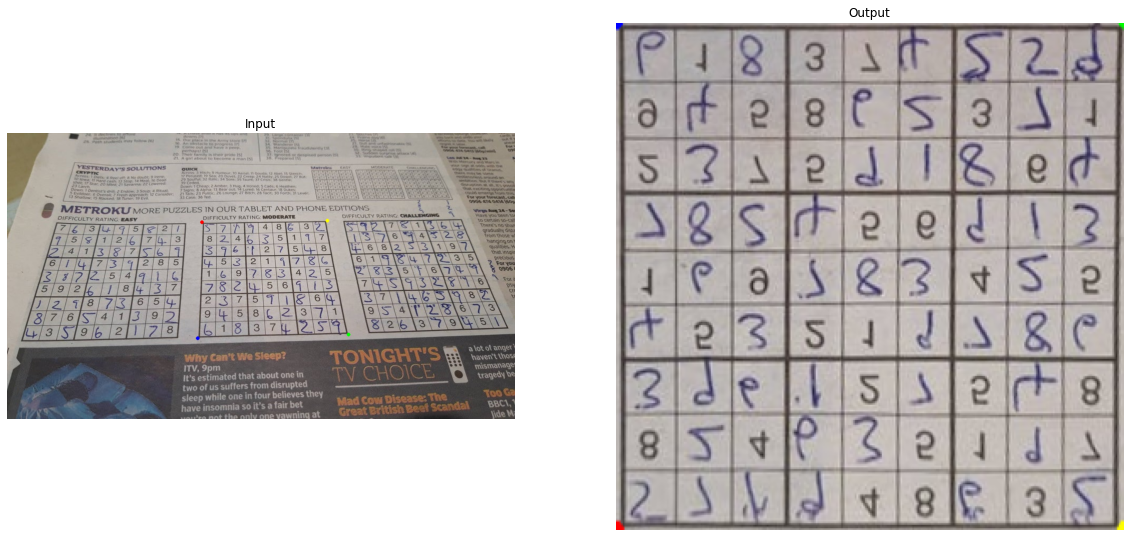

In [ ]:
#---- Muestre imagen
print ("Resultado")
_, axes = plt.subplots(1,2, figsize = (20,10))
axes[0].imshow(img); axes[0].set_title('Input'); axes[0].set_axis_off()
axes[1].imshow(imagePerspective); axes[1].set_title('Output'); axes[1].set_axis_off()
plt.show()